In [2]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from glob import glob
import cv2 as cv
import os

%matplotlib inline

In [4]:
!ls yolov5/runs/train/

In [3]:
# exp_path = 'yolov5/runs/train/exp3/'
bpt = os.path.join('weights', 'best_ep2.pt')
model = torch.hub.load('ultralytics/yolov5', 'custom', path = bpt, device = torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
model

Using cache found in C:\Users\Muhammed Jaabir/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-20 torch 1.11.0+cpu CPU

Fusing layers... 
Model summary: 367 layers, 46113663 parameters, 0 gradients, 107.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 64, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      

In [5]:
!ls {exp_path}

events.out.tfevents.1650243882.face.6719.0  opt.yaml	      train_batch2.jpg
hyp.yaml				    results.csv       weights
labels.jpg				    train_batch0.jpg
labels_correlogram.jpg			    train_batch1.jpg


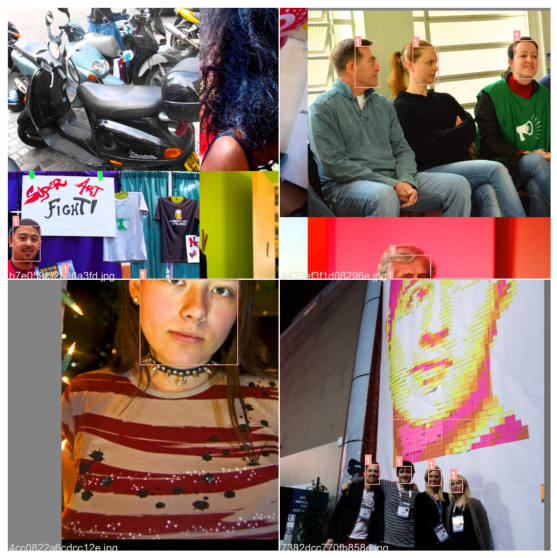

In [6]:
%matplotlib inline
plt.figure(figsize = (15, 10))
plt.imshow(plt.imread(os.path.join(exp_path, 'train_batch0.jpg')))
plt.axis(False);

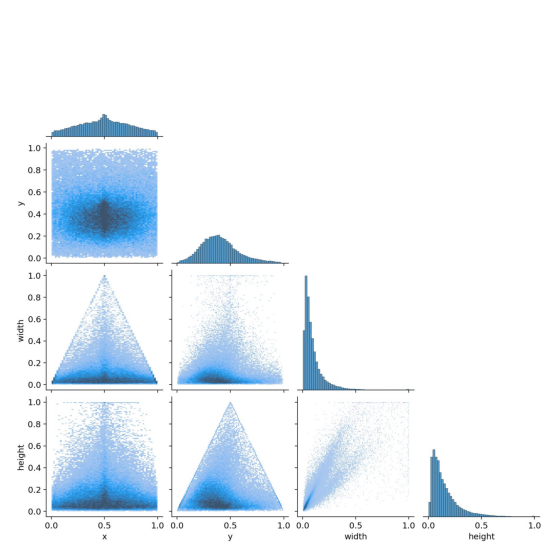

In [9]:
plt.figure(figsize = (15, 10))
plt.imshow(plt.imread(os.path.join(exp_path, 'labels_correlogram.jpg')))
plt.axis(False);

In [7]:
# pd.options.display.max
results = pd.read_csv(os.path.join(exp_path, 'results.csv'))
results.T

,0,1
epoch,0.000000,1.000000
train/box_loss,0.049685,0.033129
train/obj_loss,0.029844,0.022911
train/cls_loss,0.003269,0.000654
metrics/precision,0.312150,0.305050
metrics/recall,0.119990,0.127950
metrics/mAP_0.5,0.144410,0.162900
metrics/mAP_0.5:0.95,0.078837,0.092551
val/box_loss,0.085084,0.086648
val/obj_loss,0.168350,0.179350


<a href='yolov5/runs/train/exp3/weights/best.pt'> download best weight</a>

In [11]:
imgs = np.random.choice(glob('datasets/open-images-v6/validation/images/*'), 3).tolist()
imgs

['datasets/open-images-v6/validation/images/012bfb1d9f9afc48.jpg',
 'datasets/open-images-v6/validation/images/b9774485fd538233.jpg',
 'datasets/open-images-v6/validation/images/defc1d004e248e22.jpg']

In [12]:
res = model(imgs)

In [13]:
res.print()

image 1/3: 1024x753 4 human_faces
image 2/3: 678x1024 2 human_faces
image 3/3: 1024x683 1 human_face
Speed: 29.6ms pre-process, 1911.3ms inference, 1.5ms NMS per image at shape (3, 3, 640, 640)


In [14]:
def show_imgs(res):
    plt.figure(1)
    plt.imshow(res.render()[0])
    
    plt.figure(2)
    plt.imshow(res.render()[1])
    
    plt.figure(3)
    plt.imshow(res.render()[2])
    
    plt.axis(False)
    plt.show

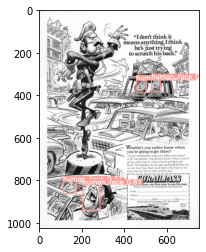

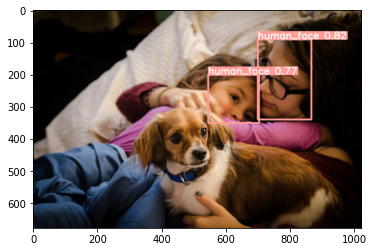

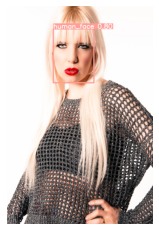

In [15]:
show_imgs(res)

In [20]:
# x y w h conf cls 
res.xywh[1][0]

tensor([783.29871, 215.99043, 167.20538, 248.19247,   0.82464,   1.00000])

In [16]:
a = torch.tensor([367.92749, 160.02129, 158.12500, 176.62308,   0.79333,   1.00000])
a = [a, a / 100]
a

[tensor([367.92749, 160.02129, 158.12500, 176.62308,   0.79333,   1.00000]),
 tensor([3.67927, 1.60021, 1.58125, 1.76623, 0.00793, 0.01000])]

In [17]:
[i[:4] for i in a]

[tensor([367.92749, 160.02129, 158.12500, 176.62308]),
 tensor([3.67927, 1.60021, 1.58125, 1.76623])]

In [4]:
## sending the numpy array as the input 


img = os.path.join('assets', 't1.jfif')
img = plt.imread(img)
res = model([img])
res.print()

image 1/1: 657x1000 1 human_face
Speed: 49.0ms pre-process, 1668.5ms inference, 3.0ms NMS per image at shape (1, 3, 448, 640)


In [18]:
img.shape

(657, 1000, 3)

(-0.5, 999.5, 656.5, -0.5)

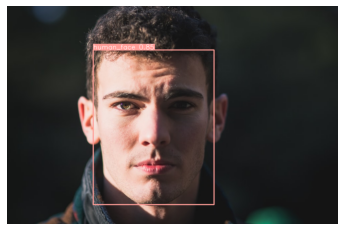

In [5]:
%matplotlib inline
plt.imshow(res.render()[0])
plt.axis(False)

In [12]:
res.xyxy[0][0]

tensor([260.45599, 132.58797, 625.37653, 598.92334,   0.85462,   1.00000])

(-0.5, 364.5, 465.5, -0.5)

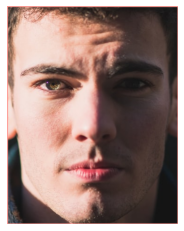

In [18]:
x, y, x2, y2, _, _ = list(map(int, res.xyxy[0][0]))
cimg = img[y:y2, x:x2]
plt.imshow(cimg)
plt.axis(False)

In [14]:
print(res.print())

image 1/1: 657x1000 1 human_face
Speed: 15.0ms pre-process, 1794.2ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


None


In [15]:
dir(res)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'crop',
 'display',
 'files',
 'imgs',
 'n',
 'names',
 'pandas',
 'pred',
 'print',
 'render',
 's',
 'save',
 'show',
 't',
 'times',
 'tolist',
 'xywh',
 'xywhn',
 'xyxy',
 'xyxyn']

In [26]:
res.render()[0].shape

(657, 1000, 3)